In [1]:
pip install tfcausalimpact

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"
plt.rcParams['figure.figsize'] = [16, 6]

* Apply BSTS modeling to understand the causal effect of treatment in time-series.

In [3]:
import numpy as np
from causalimpact import CausalImpact

* Load a dataset, and estimate the consequence of a treatment.
* Estimate the impact of the emissions scandal of September
2015 for Volkswagen.
* Work with the stock values of three big companies,
Volkswagen, BMW, and Allianz.
* The dataset comes with the Python Causal Impact (tfcausalimpact) library.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


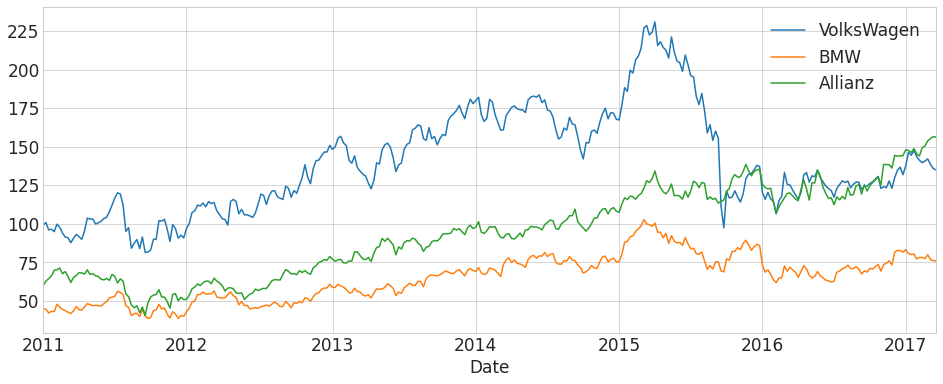

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/volks_data.csv", header=0, sep=' ', index_col='Date', parse_dates=True)
data.plot();

* See a sharp drop in the value of Volkswagen shares in late 2015.
* Try to find out the actual impact of the emission scandal.

In [5]:
pre_period = [str(np.min(data.index.values)), "2015-09-13"]
post_period = ["2015-09-20", str(np.max(data.index.values))]

ci = CausalImpact(data.iloc[:, 0], pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})

Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


* The model statistics provide the causal impact estimate.

In [6]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         171.72 (16.24)     13566.27 (1283.17)
95% CI                    [138.61, 202.29]   [10950.57, 15980.52]

Absolute effect (s.d.)    -44.81 (16.24)     -3540.21 (1283.17)
95% CI                    [-75.37, -11.7]    [-5954.45, -924.5]

Relative effect (s.d.)    -26.1% (9.46%)     -26.1% (9.46%)
95% CI                    [-43.89%, -6.81%]  [-43.89%, -6.81%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.7%

For more details run the command: print(impact.summary('report'))


* The Causal Impact model developed by Google works by fitting
a BSTS model to observed data, which is later used to predict what the results would be had no intervention happened in a given time period.
* The total estimated effect is about 44 points—the stock price would be 44 points higher if not for the emissions scandal. 

In [7]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 126.91. By contrast, in the absence of an
intervention, we would have expected an average response of 171.72.
The 95% interval of this counterfactual prediction is [138.61, 202.29].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -44.81 with a 95% interval of
[-75.37, -11.7]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 10026.07.
By contrast, had the intervention not taken place, we would have expected
a sum of 13566.27. The 95% interval of this prediction is [10950.57, 15980.52].


The above results are given in terms of absolute numbers. In relative
terms, the r

* Plot the effect.
* See the original time-series against the predicted counterfactual value.

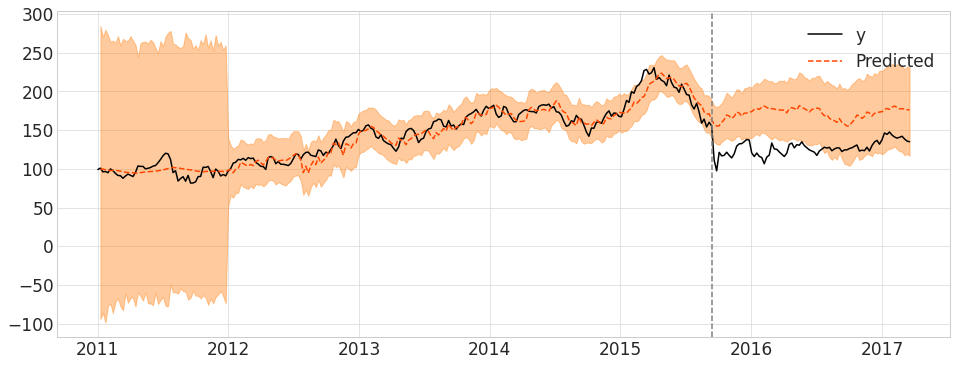

In [8]:
ci.plot(panels=["original"], figsize=(16, 6))

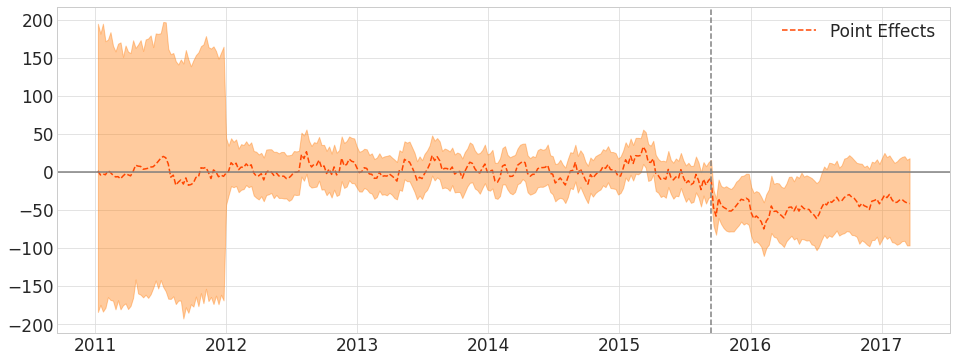

In [9]:
ci.plot(panels=["pointwise"], figsize=(16, 6))

* The emissions scandal wiped out a massive amount of value from Volkswagen. 
* The 44 points show a monetary value of how much cheating emissions tests cost
Volkswagen.